<h1><center> <font color='#0000A0'>EDA</font> </center></h1>
<hr>

### 데이터 불러오기

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

aud = pd.read_csv('audience1_temp/audience1_temp.csv')
aud = aud.drop([aud.columns[0], aud.columns[-1]], axis=1)

display(aud.head(3), aud.agg(['count', 'nunique']))

,device_ifa,age,gender,marry,install_pack,cate_code,predicted_house_price
0,pNsdu6NgYi,6,M,M,"p25485g,p26591g,p32892g,p13661g,p12912g,p16508...","20008:5,21001:1,01003:2,14004:2,06009:2,03003:...",NaN
1,wkArj04TVP,6,F,M,"p44316g,p14119g,p16467g,p3022g,p12928g,p10122g...","09001:1,13002:3,01003:1,16004:3,18002:1,21007:...",NaN
2,eEpLl32LWY,7,F,M,"p12957g,p17521g,p12912g,p13081g,p31860g,p16620...","16002:5,19001:4,04011:1,p0011:1,18004:3,p0010:...",12900.0


,device_ifa,age,gender,marry,install_pack,cate_code,predicted_house_price
count,812780,812780,812780,812780,812780,812780,655156
nunique,812780,12,2,2,812780,812780,3508


#### 이 중에서 cate_code만 집중적으로 살펴보기로함.
> 결측치는 없음.

In [2]:
CC = aud['cate_code'].to_frame()

CC["FULL"] = CC["cate_code"].str.findall(r"[\w']+")
CC['FULL_len'] = CC['FULL'].str.len()

CC.head(3)

,cate_code,FULL,FULL_len
0,"20008:5,21001:1,01003:2,14004:2,06009:2,03003:...","[20008, 5, 21001, 1, 01003, 2, 14004, 2, 06009...",80
1,"09001:1,13002:3,01003:1,16004:3,18002:1,21007:...","[09001, 1, 13002, 3, 01003, 1, 16004, 3, 18002...",112
2,"16002:5,19001:4,04011:1,p0011:1,18004:3,p0010:...","[16002, 5, 19001, 4, 04011, 1, p0011, 1, 18004...",104


<hr>
<h4>1. 모두 쌍으로 이루어진 데이터인지 확인</h4>

In [3]:
only_odd = [num for num in CC['FULL_len'] if num % 2 == 1] 
print("홀수 갯수: " , len(only_odd) )

홀수 갯수:  0


> 홀수 갯수가 없는 것으로 보아, <b>:</b> 를 기준으로 숫자가 쌍을 이루고 있을 가능성이 큼.  
> 도메인 지식을 활용해본다면, cate_code는 일종의 문답 형태일 것.

<hr>
<h4>2. 문답은 응답자마다 같은 갯수로 이루어졌는지?</h4>

In [4]:
CC['pair_len'] = CC['FULL_len']/2

display(CC[CC['pair_len'].values ==  CC.pair_len.min()], CC[CC['pair_len'].values ==  CC.pair_len.max()])

,cate_code,FULL,FULL_len,pair_len
240150,21013:1,"[21013, 1]",2,1.0


,cate_code,FULL,FULL_len,pair_len
123303,"06004:1,16002:2,16004:2,18002:1,14004:2,21004:...","[06004, 1, 16002, 2, 16004, 2, 18002, 1, 14004...",344,172.0


> 같은 갯수만큼의 응답이 이루어지고 있지 않는다.

In [5]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = CC.pair_len.to_list()
num_bins = CC.pair_len.nunique()
plt.figure(figsize=[20,5])
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

<Figure size 2000x500 with 1 Axes>

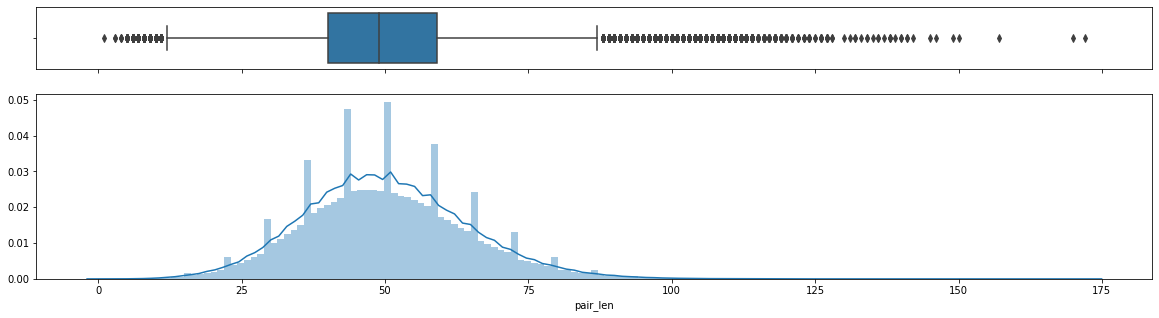

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize = [20,5])

# Add a graph in each part
sns.boxplot(CC.pair_len, ax=ax_box)
sns.distplot(CC.pair_len, ax=ax_hist, bins = num_bins)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

> 문답의 갯수가 응답자들 사이에서 정규분포를 띄고 있음.

<hr>
<h4>3. 문답에 패턴과 다른 이상값이 존재하지는 않는가?</h4>

In [7]:
def long(x):
    return x[::2]

def short(x):
    return x[1::2]

CC["long"] = CC["FULL"].apply(long)
CC["short"] = CC["FULL"].apply(short)

CC.head(3)

,cate_code,FULL,FULL_len,pair_len,long,short
0,"20008:5,21001:1,01003:2,14004:2,06009:2,03003:...","[20008, 5, 21001, 1, 01003, 2, 14004, 2, 06009...",80,40.0,"[20008, 21001, 01003, 14004, 06009, 03003, 130...","[5, 1, 2, 2, 2, 5, 1, 1, 2, 3, 3, 2, 2, 4, 3, ..."
1,"09001:1,13002:3,01003:1,16004:3,18002:1,21007:...","[09001, 1, 13002, 3, 01003, 1, 16004, 3, 18002...",112,56.0,"[09001, 13002, 01003, 16004, 18002, 21007, 080...","[1, 3, 1, 3, 1, 4, 3, 5, 1, 3, 3, 2, 4, 4, 2, ..."
2,"16002:5,19001:4,04011:1,p0011:1,18004:3,p0010:...","[16002, 5, 19001, 4, 04011, 1, p0011, 1, 18004...",104,52.0,"[16002, 19001, 04011, p0011, 18004, p0010, 190...","[5, 4, 1, 1, 3, 1, 4, 1, 1, 4, 4, 4, 3, 3, 4, ..."


In [8]:
CC.to_csv('cate_code.csv')

> 혹시 메모리 부족으로 컴퓨터가 꺼질 수 있으니 저장하자.

In [9]:
print("모든 short 값의 범위 : {}~{}".format(CC.short.min(), CC.short.max()))

모든 short 값의 범위 : ['1']~['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']


<hr>
<h4>4. long은 중복된 값을 가지고 있는가?</h4>

In [20]:
CC['num_uniq_long'] = [len(set(v)) for v in CC['long']]

In [21]:
CC.head(3)

,cate_code,FULL,FULL_len,pair_len,long,short,num_uniq_long
0,"20008:5,21001:1,01003:2,14004:2,06009:2,03003:...","[20008, 5, 21001, 1, 01003, 2, 14004, 2, 06009...",80,40.0,"[20008, 21001, 01003, 14004, 06009, 03003, 130...","[5, 1, 2, 2, 2, 5, 1, 1, 2, 3, 3, 2, 2, 4, 3, ...",40
1,"09001:1,13002:3,01003:1,16004:3,18002:1,21007:...","[09001, 1, 13002, 3, 01003, 1, 16004, 3, 18002...",112,56.0,"[09001, 13002, 01003, 16004, 18002, 21007, 080...","[1, 3, 1, 3, 1, 4, 3, 5, 1, 3, 3, 2, 4, 4, 2, ...",56
2,"16002:5,19001:4,04011:1,p0011:1,18004:3,p0010:...","[16002, 5, 19001, 4, 04011, 1, p0011, 1, 18004...",104,52.0,"[16002, 19001, 04011, p0011, 18004, p0010, 190...","[5, 4, 1, 1, 3, 1, 4, 1, 1, 4, 4, 4, 3, 3, 4, ...",52


In [22]:
CC['diff'] = CC['pair_len'] - CC['num_uniq_long']
CC['diff'].unique()

array([0.])

> 모든 audience들은 중복된 문제를 갖고 있지 않다.

<hr>

<h4>5. 공통 문제가 있는가? 있다면 어떤 분포를 가지고 있는가?</h4>

In [ ]:
tmp = pd.DataFrame(CC.long.values.tolist())

In [39]:
tmp.to_csv('long.csv')

> 혹시 메모리가 부족할 수 있으니 csv 파일로 저장하자.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
long = pd.read_csv('long.csv',  index_col=0, na_filter = False)
long

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,20008,21001,01003,14004,06009,03003,13003,23005,p0010,13004,17008,06007,18002,14003,11004,03016,19002,21007,01002,14005,15001,21011,06001,06003,15004,04003,05001,21005,16002,19003,19011,21013,21004,21002,19006,04001,15003,19001,06002,06006,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,09001,13002,01003,16004,18002,21007,08003,21004,21005,21001,06001,15003,14003,10002,20008,16005,13004,19011,21002,16002,21003,13001,21015,19002,19003,02003,06009,14004,20006,16006,p0020,24001,02002,06007,09004,16001,24002,06003,p0004,03003,20007,16003,13003,20002,03004,21013,15001,20001,18004,19001,03006,p0005,01002,06006,14005,15004,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,16002,19001,04011,p0011,18004,p0010,19002,19003,p0025,15003,21001,21002,21007,09005,04013,21009,13003,21015,04001,06012,21010,23005,21013,21005,21006,05003,06001,03003,14005,p0020,05006,04020,04005,08001,21014,14003,20008,01002,06006,15004,08002,01003,21003,21004,06009,14004,19005,19011,21008,08003,04019,02005,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,01002,21009,21005,15001,14005,18004,19001,17003,20008,14004,13004,16006,06001,16001,21002,01003,14002,19004,14003,p0019,21007,19002,19003,21013,06004,16002,16004,18006,06006,13003,21015,15004,21001,06009,06007,p0020,05006,02003,03003,15003,23005,21004,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,20008,14003,19001,21013,15004,21005,06001,03003,15001,19003,15003,08003,02005,19002,08001,21014,21012,20007,p0025,21003,13001,21015,23005,14004,06006,14005,06009,08002,21006,21009,21010,05003,21008,04001,04002,21007,09001,p0010,18002,09006,01003,18006,p0019,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,21007,19001,04009,19003,13001,18002,14003,09001,20007,21004,06001,15003,01003,01011,06007,14005,21001,21003,15001,03003,01002,16002,04018,20008,10001,08002,09004,13003,14002,06009,04012,04005,14004,12004,21013,15004,21009,06003,19005,21008,04002,06006,23005,p0010,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,21007,04020,06009,15004,06004,09006,14002,21001,19001,19002,06006,13003,21015,23005,p0010,20008,01003,22009,05004,04001,15003,06012,18001,14005,20002,19003,04016,21004,15001,14003,16002,20007,13001,21014,18002,18004,03006,21013,03003,06007,14004,06001,24002,21002,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,21009,06007,19003,p0022,19001,06009,15004,21007,04001,04010,15003,20008,20005,p0010,15001,14004,20007,06001,06006,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,21010,19003,19001,19002,21013,03003,p0010,21009,21001,21007,23005,p0020,05006,01003,16004,18002,06009,15004,16007,21014,15001,p0017,21002,06007,p0019,15003,16002,18004,06003,13003,14003,20008,20007,04020,01002,06012,14005,14004,21004,06006,13001,21015,08003,14002,08001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [2]:
long.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
        ...  
142    object
143    object
144    object
145    object
146    object
147    object
148    object
149    object
150    object
151    object
152    object
153    object
154    object
155    object
156    object
157    object
158    object
159    object
160    object
161    object
162    object
163    object
164    object
165    object
166    object
167    object
168    object
169    object
170    object
171    object
Length: 172, dtype: object

In [3]:
vc = pd.DataFrame(long.stack().value_counts())
vc.head(3)

,0
,99038947
14004,812687
20008,810422


In [4]:
vc = vc.iloc[1:, :]
vc.rename(columns={vc.columns[0]:'freq'}, inplace=True)
vc['ratio'] = vc['freq'] / len(long)

vc.head(3)

,freq,ratio
14004,812687,0.999886
20008,810422,0.997099
15003,810370,0.997035


In [5]:
vc.to_csv('value_counts.csv')

> 힘들게 얻은 자료니깐 csv 파일로 저장하자.

In [6]:
print("문항 갯수 :", len(vc))

문항 갯수 : 241


In [8]:
import matplotlib.pyplot as plt

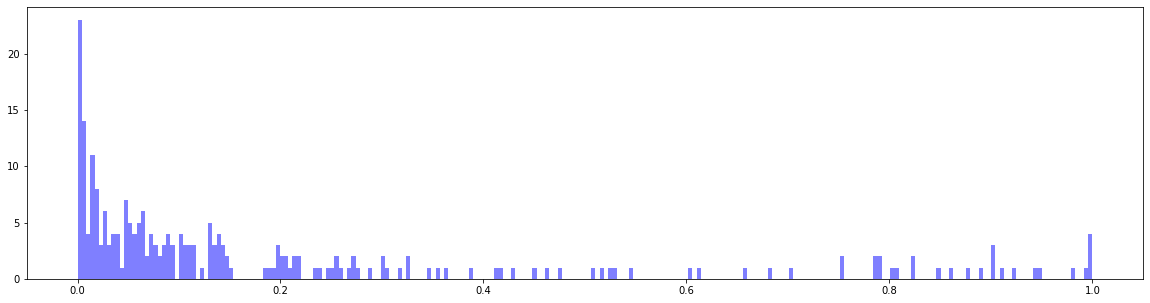

In [9]:
x = vc.ratio.to_list()
num_bins = len(vc)
plt.figure(figsize=[20,5])
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

> 대다수 질문들의 커버리지가 매우 좁음을 알 수 있다.

<hr>
<h4>6. long은 어떤 형태로 데이터가 저장되어 있는가?</h4>

In [13]:
que = vc.index.tolist()
que.sort()

In [14]:
que

['01001',
 '01002',
 '01003',
 '01004',
 '01005',
 '01006',
 '01007',
 '01008',
 '01009',
 '01010',
 '01011',
 '02001',
 '02002',
 '02003',
 '02004',
 '02005',
 '03001',
 '03002',
 '03003',
 '03004',
 '03006',
 '03007',
 '03010',
 '03011',
 '03013',
 '03014',
 '03015',
 '03016',
 '04001',
 '04002',
 '04003',
 '04005',
 '04006',
 '04007',
 '04009',
 '04010',
 '04011',
 '04012',
 '04013',
 '04014',
 '04015',
 '04016',
 '04017',
 '04018',
 '04019',
 '04020',
 '04021',
 '05001',
 '05002',
 '05003',
 '05004',
 '05006',
 '05007',
 '05008',
 '05009',
 '05010',
 '05011',
 '05012',
 '05013',
 '05014',
 '05015',
 '06001',
 '06002',
 '06003',
 '06004',
 '06005',
 '06006',
 '06007',
 '06008',
 '06009',
 '06010',
 '06011',
 '06012',
 '07001',
 '07002',
 '07003',
 '07004',
 '07005',
 '07006',
 '08001',
 '08002',
 '08003',
 '08004',
 '08005',
 '08006',
 '08007',
 '09001',
 '09002',
 '09003',
 '09004',
 '09005',
 '09006',
 '09007',
 '09008',
 '09009',
 '09010',
 '09012',
 '10001',
 '10002',
 '10003',


> 앞자리의 수는 1부터 25, 그리고 p로 이루어져있으며, 뒤의 숫자는 시작하는 숫자마다 조금씩 차이가 존재한다.  
> 사실 해당 파일이 train 데이터를 기준으로 선택된 자료들이기 때문에, 일정부분 랜덤하게 뽑힌 것으로 보인다.

<hr>

<h4>7. 혹시 도입숫자별로 커버리지에 큰 차이가 있지 않을까?</h4>
<h5>7-1. 알파벳으로 시작하는 문항</h5>

In [18]:
alpha = []

for q in que :
    if q.isdigit() != True :
        alpha.append(q)

print(alpha, len(alpha))

['p0001', 'p0002', 'p0003', 'p0004', 'p0005', 'p0006', 'p0007', 'p0008', 'p0009', 'p0010', 'p0011', 'p0012', 'p0013', 'p0014', 'p0015', 'p0016', 'p0017', 'p0018', 'p0019', 'p0020', 'p0021', 'p0022', 'p0025'] 23


> 23, 24는 빠져있다.  
> 혹시 자정을 기점으로?

In [19]:
num_bins = len(vc)
oneratio = []
tworatio = []
threeratio = []

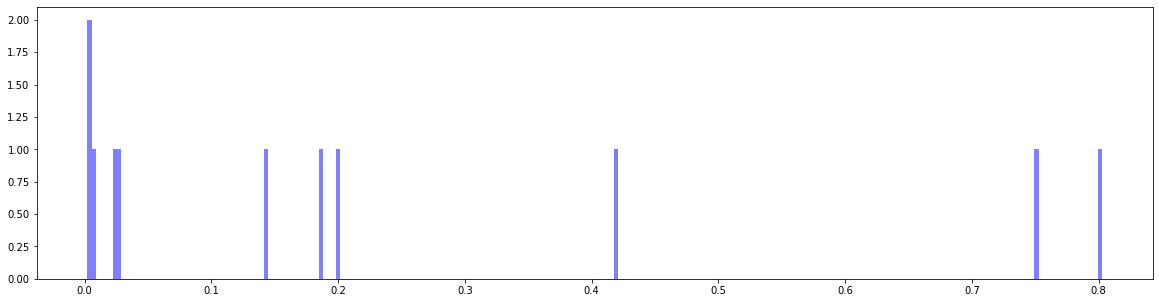

In [21]:
for i in  que[:11] :
    oneratio.append(vc[vc.index.values == i]['ratio'][0])
    
x = oneratio
plt.figure(figsize=[20,5])
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

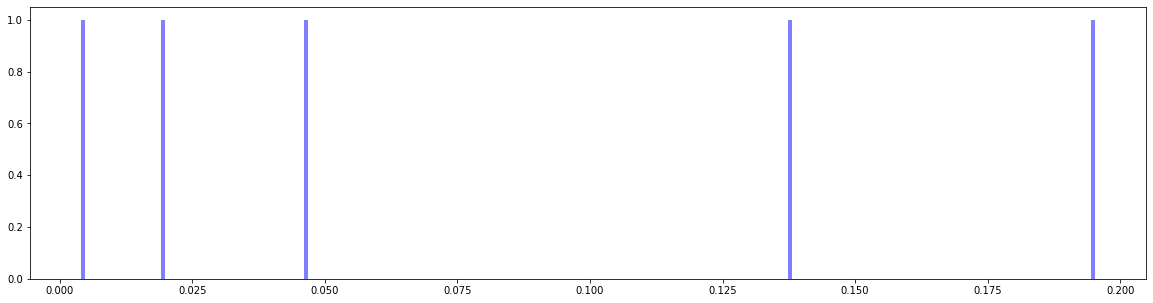

In [22]:
for i in que[11:16] :
    tworatio.append(vc[vc.index.values == i]['ratio'][0])
    
x = tworatio
plt.figure(figsize=[20,5])
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

> 02로 시작하는 문항은 매우 적은 커버리지를 보여준다.

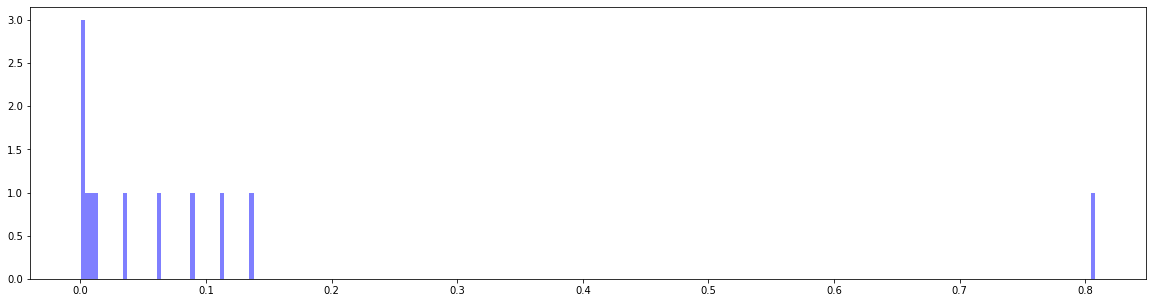

In [23]:
for i in que[16:28] :
    threeratio.append(vc[vc.index.values == i]['ratio'][0])
    
x = threeratio
plt.figure(figsize=[20,5])
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

> 유독 특정 질문만이 눈에 띄게 많은 커버리지를 가지거나 하지는 않는 것으로 보인다.

<hr>

<h2>furthermore...</h2>

> 90% 이상의 커버리지를 보이는 항목들에 대해서 각 audience들이 어떤 평점을 받았는지 확인해본다.

In [33]:
CC.head(3)

,cate_code,FULL,long,short
0,"20008:5,21001:1,01003:2,14004:2,06009:2,03003:...","[20008, 5, 21001, 1, 01003, 2, 14004, 2, 06009...","[20008, 21001, 01003, 14004, 06009, 03003, 130...","[5, 1, 2, 2, 2, 5, 1, 1, 2, 3, 3, 2, 2, 4, 3, ..."
1,"09001:1,13002:3,01003:1,16004:3,18002:1,21007:...","[09001, 1, 13002, 3, 01003, 1, 16004, 3, 18002...","[09001, 13002, 01003, 16004, 18002, 21007, 080...","[1, 3, 1, 3, 1, 4, 3, 5, 1, 3, 3, 2, 4, 4, 2, ..."
2,"16002:5,19001:4,04011:1,p0011:1,18004:3,p0010:...","[16002, 5, 19001, 4, 04011, 1, p0011, 1, 18004...","[16002, 19001, 04011, p0011, 18004, p0010, 190...","[5, 4, 1, 1, 3, 1, 4, 1, 1, 4, 4, 4, 3, 3, 4, ..."


In [24]:
vc.head(15)

,freq,ratio
14004,812687,0.999886
20008,810422,0.997099
15003,810370,0.997035
19001,810036,0.996624
15004,807806,0.993880
21007,797286,0.980937
06009,769990,0.947354
15001,768317,0.945295
19003,751033,0.924030
06006,738755,0.908924


In [27]:
o90 = vc.head(13).index.tolist()

In [30]:
o90

['14004',
 '20008',
 '15003',
 '19001',
 '15004',
 '21007',
 '06009',
 '15001',
 '19003',
 '06006',
 '23005',
 '14005',
 '06001']

In [36]:
exc = []
for i in range(len(CC)) :
    if all(elem in CC.long[i] for elem in o90) :
        exc.append(i)
        
exc

[0,
 3,
 4,
 5,
 6,
 9,
 11,
 12,
 13,
 15,
 18,
 20,
 23,
 24,
 25,
 27,
 28,
 29,
 31,
 32,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 71,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 84,
 85,
 88,
 89,
 90,
 93,
 95,
 97,
 98,
 99,
 102,
 103,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 128,
 130,
 131,
 132,
 134,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145,
 147,
 150,
 152,
 156,
 157,
 158,
 159,
 160,
 161,
 164,
 165,
 167,
 168,
 169,
 171,
 172,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 185,
 189,
 190,
 191,
 193,
 194,
 195,
 198,
 199,
 200,
 201,
 206,
 207,
 208,
 209,
 211,
 212,
 213,
 215,
 216,
 217,
 218,
 219,
 221,
 222,
 223,
 224,
 225,
 229,
 230,
 231,
 233,
 234,
 235,
 236,
 239,
 240,
 245,
 246,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 259,
 260,
 261,
 262,
 263,
 264,


In [37]:
print("90% 이상 공통질문의 커버리지 : {0:.2}".format(len(exc) / len(CC)))

90% 이상 공통질문의 커버리지 : 0.67


In [38]:
som = CC.loc[exc, :]

res = []
prefixes = o90
for i in exc :
    for ind in som['cate_code'][i].split(",") :
        if ind.startswith(tuple(prefixes)) :
            res.append(ind)

In [39]:
composite_list = [res[x:x+13] for x in range(0, len(res),13)]
for i in range(len(composite_list)) : 
    composite_list[i].sort()

In [46]:
o90.sort()
common_q = pd.DataFrame.from_records(composite_list, index = exc, columns = o90)
common_q.head(3)

,06001,06006,06009,14004,14005,15001,15003,15004,19001,19003,20008,21007,23005
0,06001:2,06006:5,06009:2,14004:2,14005:3,15001:4,15003:3,15004:1,19001:2,19003:5,20008:5,21007:3,23005:1
3,06001:2,06006:1,06009:1,14004:3,14005:4,15001:1,15003:4,15004:3,19001:2,19003:2,20008:3,21007:1,23005:5
4,06001:4,06006:3,06009:4,14004:1,14005:1,15001:2,15003:1,15004:2,19001:1,19003:5,20008:3,21007:3,23005:5


In [47]:
common_q = common_q.applymap(lambda x: x[6])
common_q.head(3)

,06001,06006,06009,14004,14005,15001,15003,15004,19001,19003,20008,21007,23005
0,2,5,2,2,3,4,3,1,2,5,5,3,1
3,2,1,1,3,4,1,4,3,2,2,3,1,5
4,4,3,4,1,1,2,1,2,1,5,3,3,5


In [48]:
common_q.to_csv('som.csv', index = False)